In [1]:
# Granger Causality Test
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from scipy import stats
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tsa.stattools import acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import adfuller
#from statsmodels.stats.diagnostic import unitroot_adf
from sklearn import preprocessing

In [2]:
path = ''

filename = 'data/output_populations_2-1000-s-s.csv'
filename2 = 'data/output_pops_E.csv'
excel_filename = 'Data_Recording_Temp.xlsx'
st = 0
ed = 400

file = path+filename
df = (pd.read_csv(file, sep=",", header=0))[st:ed]

dfIt = df['iteration']
dfS_1 = df['1']
dfS_2 = df['2']

df = pd.DataFrame({'iteration': dfIt, 'species_1': dfS_1, 'species_2': dfS_2})

print(df.head(10))

iteration  species_1  species_2
0          1      28972      38455
1          2      43387      36033
2          3      44428      35384
3          4      44558      35356
4          5      44571      35351
5          6      44575      35350
6          7      44576      35350
7          8      44576      35352
8          9      44579      35353
9         10      44579      35354


In [3]:
# Check data

print('Dickey-Fuller Test:')
df_Test = adfuller(df['species_2'], autolag='AIC')
df_Result = pd.Series(df_Test[0:4], index=['Test Statistics', 'p-Value', '#Lags used', 'Observ used'])
for key, value in df_Test[4].items():
    df_Result['Critical Value (%s)' %key] = value
print(df_Result)
print('p-Value < 0.05 (5.0e-2): ', df_Test[1] < 0.05)
print('Test Statistics < Critical Value (1%): ', df_Test[0] < df_Test[4]['1%'])
if df_Test[1]<0.05 and df_Test[0]<df_Test[4]['1%']:
    print('The given series data is stable for Granger Test')
else:
    print('The given series data is NOT stable for Granger Test')

Dickey-Fuller Test:
Test Statistics          -1.792701
p-Value                   0.384091
#Lags used               17.000000
Observ used             382.000000
Critical Value (1%)      -3.447585
Critical Value (5%)      -2.869136
Critical Value (10%)     -2.570816
dtype: float64
p-Value < 0.05 (5.0e-2):  False
Test Statistics < Critical Value (1%):  False
The given series data is NOT stable for Granger Test


In [4]:
def write_to_excel(value, name):
    df_excel = pd.DataFrame(value)
    #print("To insert:\n", df_excel)
    #df_excel = df_excel.append(ds_excel, ignore_index=True)
    df_excel.to_excel(path+excel_filename, sheet_name=name, index=False)
    

In [5]:
def format_result(data):
    output_1 = []
    output_2 = []
    output_3 = []
    output_4 = []
    output_5 = []
    output_6 = []
    output_7 = []
    output_8 = []

    for i in range(5):
        output_1.append(data[i+1][0]['ssr_ftest'][0])
        output_2.append(data[i+1][0]['ssr_ftest'][1])
        output_3.append(data[i+1][0]['ssr_chi2test'][0])
        output_4.append(data[i+1][0]['ssr_chi2test'][1])
        output_5.append(data[i+1][0]['lrtest'][0])
        output_6.append(data[i+1][0]['lrtest'][1])
        output_7.append(data[i+1][0]['params_ftest'][0])
        output_8.append(data[i+1][0]['params_ftest'][1])


    df_output = pd.DataFrame(
        {"SF_F": output_1,
         "SF_p": output_2,
         "SC_chi2": output_3,
         "SC_p": output_4,
         "LR_chi2": output_5,
         "LR_p": output_6,
         "PF_F": output_7,
         "PF_p": output_8}
    )

    print(df_output)

    return df_output



1 eats 2?
        SF_F          SF_p     SC_chi2          SC_p     LR_chi2  \
0  28.073635  1.942846e-07   28.286314  1.046332e-07   27.328665   
1  13.923199  1.438288e-06   28.200678  7.521434e-07   27.246405   
2   7.001978  1.346020e-04   21.382962  8.765341e-05   20.826981   
3  52.136963  4.102323e-35  213.397803  4.937045e-45  170.698592   
4  40.549879  1.855091e-33  208.557322  4.190270e-43  167.462325   

           LR_p       PF_F          PF_p  
0  1.716479e-07  28.073635  1.942846e-07  
1  1.212044e-06  13.923199  1.438288e-06  
2  1.143551e-04   7.001978  1.346020e-04  
3  7.405093e-36  52.136963  4.102323e-35  
4  2.537870e-34  40.549879  1.855091e-33  


2 eats 1?
         SF_F           SF_p      SC_chi2           SC_p     LR_chi2  \
0    5.431213   2.028144e-02     5.472359   1.931954e-02    5.435171   
1  102.970797   1.101760e-36   208.561716   5.145158e-46  167.699082   
2   27.362085   4.436455e-16    83.559598   5.288217e-18   75.832945   
3  255.159344  4.3576

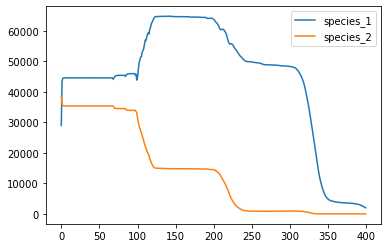

In [14]:
maxlag = 5
def GCT(dataframe):
    print('\n\n1 eats 2?')
    result_1 = grangercausalitytests(dataframe[['species_1', 'species_2']], maxlag=maxlag, verbose=False)

    df_result_1 = format_result(result_1)

    #write_to_excel(df_result_1, "1 causes 2")

    print('\n\n2 eats 1?')
    result_2 = grangercausalitytests(dataframe[['species_2', 'species_1']], maxlag=maxlag, verbose=False)
    df_result_2 = format_result(result_2)

    write_to_excel(df_result_2, "2 causes 1")

    dataframe[['species_1', 'species_2']].plot()

    # 'SSR' = Residual Sum of Squares
    # 'SSR based F test' and 'parameter F test' turn out to be the same and is what R reports (and is verified against R, IIRC).
    # statsmodels.tsa.stattools.grangercausalitytests uses the degrees of freedom definition for a single ordinary least square (OLS) estimate. 
    # works only for bivariate case.
    # 'SSR based F test' compares SSR between restricted and unrestricted model
    # 'parameter F test' builds a restriction matrix and uses the f_test of the unrestricted results instance.
    # 'parameter F test', 'SSR based F test' are based on F distribution
    # 'ssr based chi2 test', 'likelihood ratio test' are based on chi-square distribution

GCT(df)

species_1  species_2
0  -0.786684   1.760927
1  -0.041274   1.587834
2   0.012557   1.541452
3   0.019279   1.539451
4   0.019951   1.539094
5   0.020158   1.539022
6   0.020210   1.539022
7   0.020210   1.539165
8   0.020365   1.539237
9   0.020365   1.539308


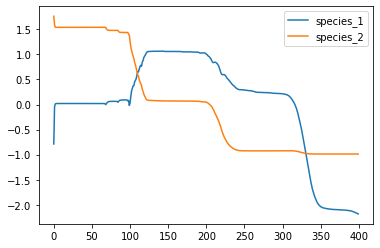

In [7]:
# Standardisation

# Create the Scaler object
scaler = preprocessing.StandardScaler()
test = df.drop(columns=['iteration'])
scaled_df = scaler.fit_transform(test)
scaled_df = pd.DataFrame(scaled_df, columns=test.columns)

print(scaled_df.head(10))
scaled_df[['species_1','species_2']].plot()

species_1  species_2
0  10.274085  10.557244
1  10.677915  10.492190
2  10.701625  10.474015
3  10.704547  10.473223
4  10.704839  10.473082
5  10.704928  10.473054
6  10.704951  10.473054
7  10.704951  10.473110
8  10.705018  10.473139
9  10.705018  10.473167


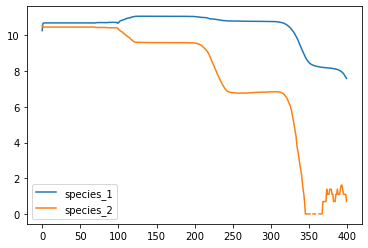

In [8]:
# Log-Transformation

logged_df = np.log(test)
print(logged_df.head(10))
logged_df[['species_1','species_2']].plot()

In [9]:
# Check data

print('Dickey-Fuller Test:')
df_Test = adfuller(scaled_df['species_1'], autolag='AIC')
df_Result = pd.Series(df_Test[0:4], index=['Test Statistics', 'p-Value', '#Lags used', 'Observ used'])
for key, value in df_Test[4].items():
    df_Result['Critical Value (%s)' %key] = value
print(df_Result)
print('p-Value < 0.05 (5.0e-2): ', df_Test[1] < 0.05)
print('Test Statistics < Critical Value (1%): ', df_Test[0] < df_Test[4]['1%'])
if df_Test[1]<0.05 and df_Test[0]<df_Test[4]['1%']:
    print('The given series data is stable for Granger Test')
else:
    print('The given series data is NOT stable for Granger Test')

Dickey-Fuller Test:
Test Statistics          -0.757430
p-Value                   0.831308
#Lags used               16.000000
Observ used             383.000000
Critical Value (1%)      -3.447540
Critical Value (5%)      -2.869116
Critical Value (10%)     -2.570806
dtype: float64
p-Value < 0.05 (5.0e-2):  False
Test Statistics < Critical Value (1%):  False
The given series data is NOT stable for Granger Test




1 eats 2?
        SF_F          SF_p     SC_chi2          SC_p     LR_chi2  \
0  28.073635  1.942846e-07   28.286314  1.046332e-07   27.328665   
1  13.923199  1.438288e-06   28.200678  7.521434e-07   27.246405   
2   7.001978  1.346020e-04   21.382962  8.765341e-05   20.826981   
3  52.136963  4.102323e-35  213.397803  4.937045e-45  170.698592   
4  40.549879  1.855091e-33  208.557322  4.190270e-43  167.462325   

           LR_p       PF_F          PF_p  
0  1.716479e-07  28.073635  1.942846e-07  
1  1.212044e-06  13.923199  1.438288e-06  
2  1.143551e-04   7.001978  1.346020e-04  
3  7.405093e-36  52.136963  4.102323e-35  
4  2.537870e-34  40.549879  1.855091e-33  


2 eats 1?
         SF_F           SF_p      SC_chi2           SC_p     LR_chi2  \
0    5.431213   2.028144e-02     5.472359   1.931954e-02    5.435171   
1  102.970797   1.101760e-36   208.561716   5.145158e-46  167.699082   
2   27.362085   4.436455e-16    83.559598   5.288217e-18   75.832945   
3  255.159344  4.3576

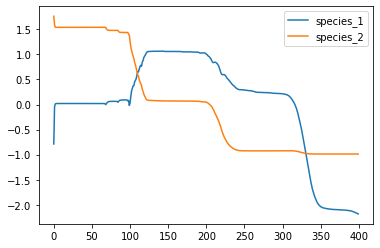

In [10]:
GCT(scaled_df)

species_1  species_2
0   -0.786684   1.760927
10   0.020365   1.539308
20   0.020365   1.539523
30   0.020365   1.539880
40   0.020365   1.540094
50   0.020365   1.540237
60   0.020365   1.540309
70   0.038464   1.491997
80   0.063440   1.478704
90   0.091364   1.437397


1 eats 2?
        SF_F      SF_p    SC_chi2      SC_p    LR_chi2      LR_p       PF_F  \
0  11.203992  0.001921  12.137658  0.000494  10.567421  0.001151  11.203992   
1   0.964286  0.391738   2.220781  0.329430   2.158310  0.339883   0.964286   
2   1.578569  0.215116   5.840704  0.119623   5.423119  0.143310   1.578569   
3   1.202635  0.332502   6.414054  0.170287   5.902590  0.206542   1.202635   
4   1.204456  0.337022   8.782492  0.118061   7.836008  0.165508   1.204456   

       PF_p  
0  0.001921  
1  0.391738  
2  0.215116  
3  0.332502  
4  0.337022  


2 eats 1?
       SF_F      SF_p   SC_chi2      SC_p   LR_chi2      LR_p      PF_F  \
0  0.394276  0.534023  0.427133  0.513399  0.424811  0.514546  0.394276

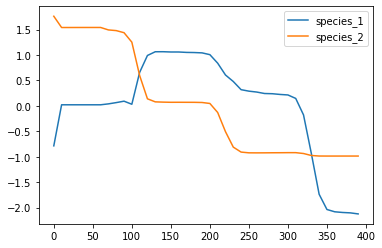

In [11]:
df_10 = scaled_df.filter(items=[i for i in range(ed-st) if i%10==0], axis=0)
#df_10.reset_index(inplace=True)
print(df_10.head(10))
GCT(df_10)

In [12]:
df_50 = scaled_df.filter(items=[i for i in range(ed-st) if i%50==0], axis=0)
#df_50.reset_index(inplace=True)
print(df_50.head(10))
GCT(df_50)

species_1  species_2
0    -0.786684   1.760927
50    0.020365   1.540237
100   0.031017   1.251583
150   1.058198   0.069523
200   1.005816   0.046511
250   0.288485  -0.923865
300   0.213815  -0.920506
350  -2.037721  -0.987256


1 eats 2?


ValueError: Insufficient observations. Maximum allowable lag is 1